# ドル円 週足 メジアン統計

In [21]:
import datetime

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pingouin as pg
import seaborn as sns
import yfinance as yf

In [22]:
code = 'USDJPY=X'
symbol = code
ticker = yf.Ticker(symbol)

In [23]:
# 週足で過去 5 年分のデータを取得
df0 = ticker.history(period='10y', interval='1wk')

# ローソク足のチャートには、そのうち過去 3 年分のみ使用する
dt_last = df0.index[len(df0) - 1]
tdelta_3y =  datetime.timedelta(days=365 * 3)
df = df0[df0.index >= dt_last - tdelta_3y]
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-06 00:00:00+00:00,133.307007,134.740997,129.569000,131.901993,0,0.0,0.0
2023-01-13 00:00:00+00:00,129.171997,131.559006,127.253998,128.539001,0,0.0,0.0
2023-01-20 00:00:00+00:00,128.369995,131.069000,128.354996,129.237000,0,0.0,0.0
2023-01-27 00:00:00+00:00,129.800003,130.475998,128.093002,128.621994,0,0.0,0.0
2023-02-03 00:00:00+00:00,128.746002,132.891998,128.335999,131.386993,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-12-05 00:00:00+00:00,155.102005,156.917999,154.352005,155.789993,0,0.0,0.0
2025-12-12 00:00:00+00:00,155.477005,156.121994,154.470001,155.494995,0,0.0,0.0
2025-12-19 00:00:00+00:00,155.567993,157.753006,155.567993,156.175995,0,0.0,0.0


In [24]:
dt = df.tail(1).index[0]
date_str = f"{dt.month:02d}{dt.day:02d}"
date_str

'0103'

In [25]:
df.tail(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2026-01-03 00:00:00+00:00,156.751007,157.001007,156.509003,156.841995,0,0.0,0.0


In [26]:
df.tail(2)['Close']

Date
2025-12-26 00:00:00+00:00    156.412994
2026-01-03 00:00:00+00:00    156.841995
Name: Close, dtype: float64

In [27]:
df.tail(2)['Close'].diff()

Date
2025-12-26 00:00:00+00:00         NaN
2026-01-03 00:00:00+00:00    0.429001
Name: Close, dtype: float64

In [28]:
df['Close'].rolling(9).median().tail(5)

Date
2025-12-05 00:00:00+00:00    154.712997
2025-12-12 00:00:00+00:00    155.106995
2025-12-19 00:00:00+00:00    155.494995
2025-12-26 00:00:00+00:00    155.789993
2026-01-03 00:00:00+00:00    156.175995
Name: Close, dtype: float64

In [29]:
df['Close'].rolling(13).median().tail(5)

Date
2025-12-05 00:00:00+00:00    152.722000
2025-12-12 00:00:00+00:00    154.072998
2025-12-19 00:00:00+00:00    154.712997
2025-12-26 00:00:00+00:00    155.106995
2026-01-03 00:00:00+00:00    155.494995
Name: Close, dtype: float64

In [30]:
df['Close'].rolling(26).median().tail(5)

Date
2025-12-05 00:00:00+00:00    147.991501
2025-12-12 00:00:00+00:00    148.377007
2025-12-19 00:00:00+00:00    148.988503
2025-12-26 00:00:00+00:00    150.099998
2026-01-03 00:00:00+00:00    151.463997
Name: Close, dtype: float64

In [31]:
df['Close'].rolling(52).median().tail(20)

Date
2025-08-22 00:00:00+01:00    148.141006
2025-08-29 00:00:00+01:00    148.141006
2025-09-05 00:00:00+01:00    148.141006
2025-09-12 00:00:00+01:00    148.141006
2025-09-19 00:00:00+01:00    148.384506
2025-09-26 00:00:00+01:00    148.384506
2025-10-03 00:00:00+01:00    148.384506
2025-10-10 00:00:00+01:00    148.384506
2025-10-17 00:00:00+01:00    148.384506
2025-10-24 00:00:00+01:00    148.384506
2025-10-31 00:00:00+00:00    148.384506
2025-11-07 00:00:00+00:00    148.384506
2025-11-14 00:00:00+00:00    148.384506
2025-11-21 00:00:00+00:00    148.384506
2025-11-28 00:00:00+00:00    148.384506
2025-12-05 00:00:00+00:00    148.384506
2025-12-12 00:00:00+00:00    148.384506
2025-12-19 00:00:00+00:00    148.384506
2025-12-26 00:00:00+00:00    148.384506
2026-01-03 00:00:00+00:00    148.384506
Name: Close, dtype: float64

In [32]:
df0['Close'].rolling(100).median().tail(5)

Date
2025-12-05 00:00:00+00:00    150.414001
2025-12-12 00:00:00+00:00    150.508507
2025-12-19 00:00:00+00:00    150.555504
2025-12-26 00:00:00+00:00    150.611504
2026-01-03 00:00:00+00:00    150.708000
Name: Close, dtype: float64

In [33]:
df0['Close'].rolling(200).median().tail(5)

Date
2025-12-05 00:00:00+00:00    146.171501
2025-12-12 00:00:00+00:00    146.270996
2025-12-19 00:00:00+00:00    146.340996
2025-12-26 00:00:00+00:00    146.465500
2026-01-03 00:00:00+00:00    146.615997
Name: Close, dtype: float64

In [34]:
df0['Close'].rolling(300).median().tail(5)

Date
2025-12-05 00:00:00+00:00    137.486496
2025-12-12 00:00:00+00:00    137.621002
2025-12-19 00:00:00+00:00    137.971504
2025-12-26 00:00:00+00:00    138.355003
2026-01-03 00:00:00+00:00    138.761002
Name: Close, dtype: float64

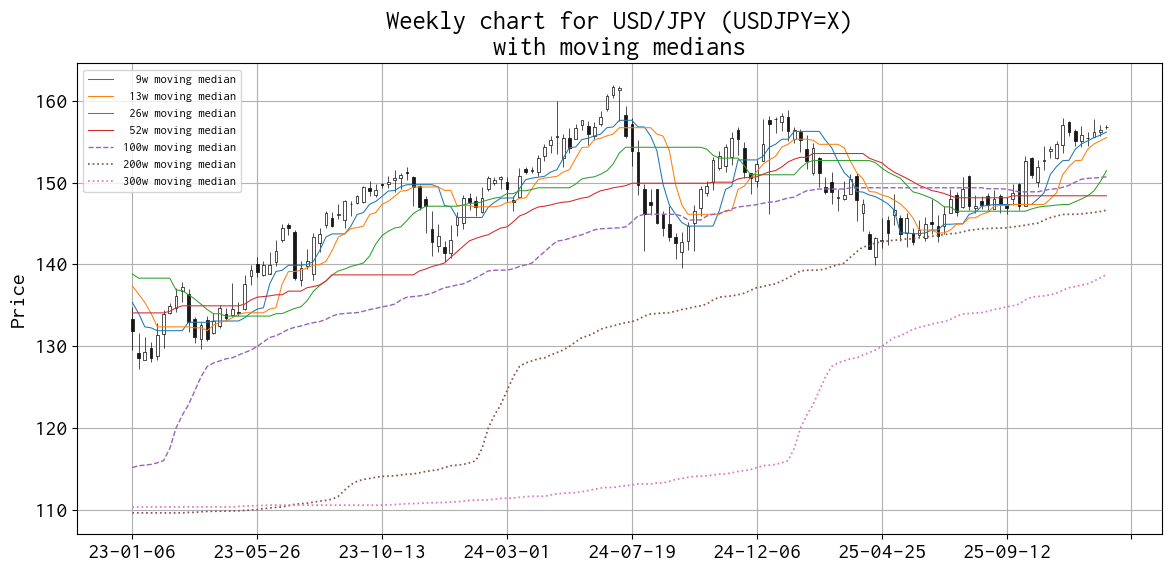

In [35]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

mm09 = df0['Close'].rolling(9).median()
mm13 = df0['Close'].rolling(13).median()
mm26 = df0['Close'].rolling(26).median()
mm52 = df0['Close'].rolling(52).median()
mm100 = df0['Close'].rolling(100).median()
mm200 = df0['Close'].rolling(200).median()
mm300 = df0['Close'].rolling(300).median()
apds  = [
    mpf.make_addplot(mm09[df.index], width=0.75, label='  9w moving median', ax=ax),
    mpf.make_addplot(mm13[df.index], width=0.75, label=' 13w moving median', ax=ax),
    mpf.make_addplot(mm26[df.index], width=0.75, label=' 26w moving median', ax=ax),
    mpf.make_addplot(mm52[df.index], width=0.75, label=' 52w moving median', ax=ax),
    mpf.make_addplot(mm100[df.index], width=1, linestyle='dashed', label='100w moving median', ax=ax),
    mpf.make_addplot(mm200[df.index], width=1.25, linestyle='dotted', label='200w moving median', ax=ax),
    mpf.make_addplot(mm300[df.index], width=1.25, linestyle='dotted', label='300w moving median', ax=ax),
]   

mpf.plot(
    df, type='candle', style='default',
    volume=False,
    datetime_format='%y-%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax,
)
ax.set_title('Weekly chart for %s (%s)\nwith moving medians' % (ticker.info['longName'], symbol))

ax.legend(loc='best', fontsize=9)
ax.grid()

plt.tight_layout()
plt.savefig(f"{date_str}_report_weekly_chart_robust_{code}.png")
plt.show()

## Robust Bollinger bands

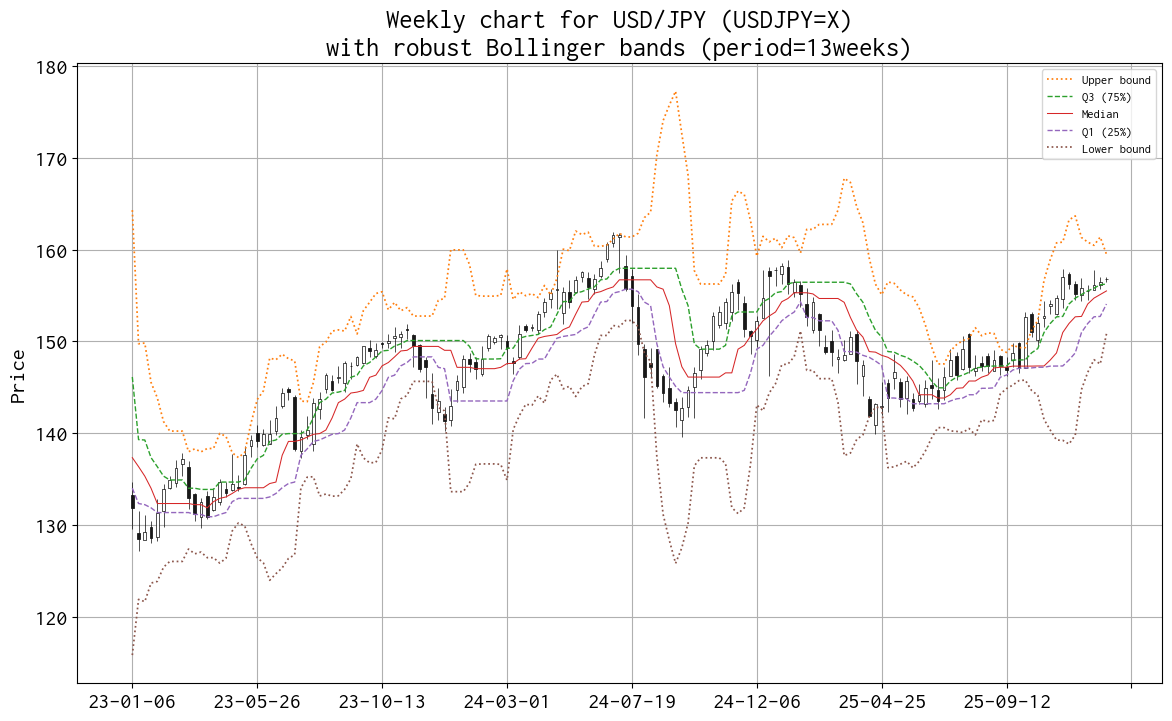

In [36]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 7.5))

# Bollinger bands
period = 13
mv_median = df0['Close'].rolling(period).median()
mv_q1 = df0['Close'].rolling(period).quantile(.25)
mv_q3 = df0['Close'].rolling(period).quantile(.75)
mv_iqr = mv_q3 - mv_q1
mv_lower = mv_q1 - mv_iqr * 1.5
mv_upper = mv_q3 + mv_iqr * 1.5

apds  = [
    mpf.make_addplot(mv_upper[df.index], width=1.25, color='C1', linestyle='dotted', label='Upper bound', ax=ax),
    mpf.make_addplot(mv_q3[df.index], width=1, color='C2', linestyle='dashed', label='Q3 (75%)', ax=ax),
    mpf.make_addplot(mv_median[df.index], width=0.75, color='C3', label='Median', ax=ax),
    mpf.make_addplot(mv_q1[df.index], width=1, color='C4', linestyle='dashed', label='Q1 (25%)', ax=ax),
    mpf.make_addplot(mv_lower[df.index], width=1.25, color='C5', linestyle='dotted', label='Lower bound', ax=ax),
]

mpf.plot(df, type='candle', style='default', addplot=apds, datetime_format='%y-%m-%d', xrotation=0, ax=ax)

ax.grid()
ax.legend(loc='best', fontsize=9)

try:
    ax.set_title('Weekly chart for %s (%s)\nwith robust Bollinger bands (period=%dweeks)' % (ticker.info['longName'], symbol, period))
except KeyError:
    ax.set_title('Weekly chart for %s\nwith robust Bollinger bands (period=%sweeks)' % (symbol, period))

plt.tight_layout()
plt.savefig(f"{date_str}_report_weekly_chart_bollinger_robust_{code}.png")
plt.show()

## ヒストグラム

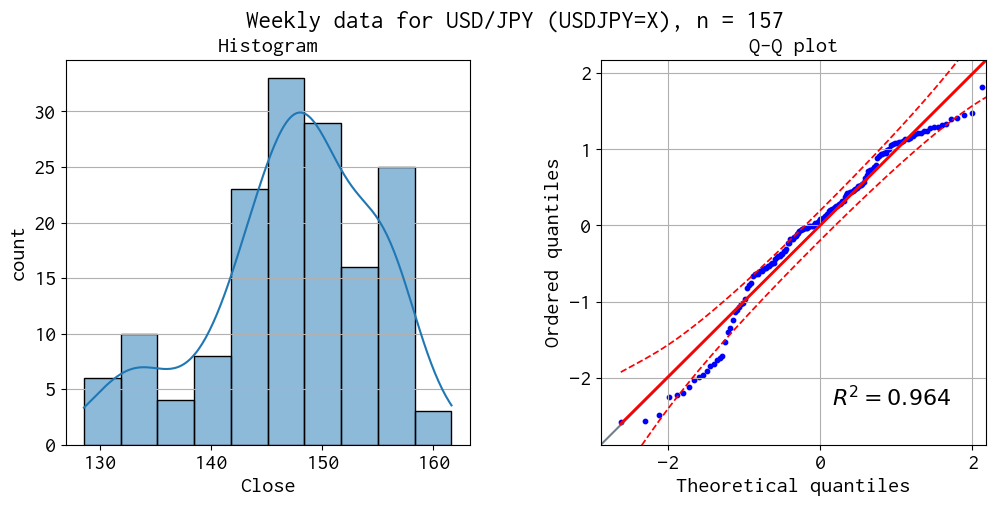

In [37]:
plt.rcParams['font.size'] = 16

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(
    df['Close'],
    kde=True,
    ax=axes[0]
)

# ヒストグラム
axes[0].set_xlabel("Close")
axes[0].set_ylabel("count")
axes[0].grid(axis = 'y')
axes[0].set_title('Histogram', fontsize=16)

# Q-Q プロット
pg.qqplot(df['Close'], s=10,  ax=axes[1])
axes[1].set_title('Q-Q plot', fontsize=16)
axes[1].grid()

plt.suptitle('Weekly data for %s (%s), n = %d' % (ticker.info['longName'], symbol, len(df)), fontsize=18)
plt.subplots_adjust(wspace=0.3)
plt.savefig(f"{date_str}_report_weekly_histogram_qqplot_{code}.png")
plt.show()